In [26]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv('ADANI_ENTERPRISES.csv')

# Step 2: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Feature Engineering
# Calculate residual return (W)
def calculate_residual_return(row):
    r = row['Close']
    a = b1 = b2 = b3 = b4 = b5 = 0
    
    # Calculating the residual return using the given formula
    residual_return = r - (a + b1 * df['Close'].shift(2).loc[df['Date'] == row['Date']].values +
                          b2 * df['Close'].shift(1).loc[df['Date'] == row['Date']].values +
                          b3 * df['Close'].loc[df['Date'] == row['Date']].values +
                          b4 * df['Close'].shift(-1).loc[df['Date'] == row['Date']].values +
                          b5 * df['Close'].shift(-2).loc[df['Date'] == row['Date']].values)
    
    return np.log(1 + residual_return)

df['W'] = df.apply(calculate_residual_return, axis=1)

# Step 4: Grouping by Date
grouped_df = df.groupby([df['Date'].dt.year])

# Step 5: Calculating the third moment and square of the second moment for each group
third_moment = grouped_df['W'].apply(lambda x: (x**3).mean())
second_moment_squared = grouped_df['W'].apply(lambda x: (x**2).mean())**2

# Step 6: Calculating NCSKEW using the provided formula, handling division by zero
ncskew = np.where(second_moment_squared == 0, np.nan, - (grouped_df.size() * (grouped_df.size() - 1)**(3/2) * third_moment) / ((grouped_df.size() - 1) * (grouped_df.size() - 2) * second_moment_squared**(3/2)))

# Step 7: Creating a new DataFrame with Dates and NCSKEW
ncskew_df = pd.DataFrame({
    'Date': grouped_df.apply(lambda x: x['Date'].iloc[0]).values,
    'NCSKEW': ncskew
})

# Step 8: Output to CSV
ncskew_df.to_csv('ncskew_output_adani.csv', index=False)

print(ncskew_df)


C:\Users\HP\AppData\Local\Temp\ipykernel_25872\357263542.py:8: UserWarning: Parsing '15-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\357263542.py:8: UserWarning: Parsing '16-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\357263542.py:8: UserWarning: Parsing '17-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\357263542.py:8: UserWarning: Parsing '18-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\3

         Date                  NCSKEW
0  2002-02-07                   [nan]
1  2003-01-01   [-26.006322399638144]
2  2004-01-01                   [nan]
3  2005-03-01    [-2.729940591689082]
4  2006-02-01   [-1.3935891787487964]
5  2007-02-01    [-0.435512846235766]
6  2008-01-01  [-0.27890347991320735]
7  2009-02-01  [-0.29674776715360957]
8  2010-04-01                   [nan]
9  2011-03-01   [-0.1789467241806484]
10 2012-02-01                   [nan]
11 2013-01-01   [-0.3721204967961563]
12 2014-01-01                   [nan]
13 2015-01-01                   [nan]
14 2016-01-01   [-0.3104221071963645]
15 2017-02-01  [-0.21452032790414494]
16 2018-01-01  [-0.14925056572093007]
17 2019-01-01  [-0.12381487406676564]
18 2020-01-01  [-0.10059453898543824]
19 2021-01-01  [-0.04407318904372246]
20 2022-03-01  [-0.03285843902790456]
21 2023-02-01                   [nan]


In [35]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Step 1: Load the dataset
df = pd.read_csv('ADANI_ENTERPRISES.csv')

# Step 2: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Feature Engineering
# Calculate residual return (W)
def calculate_residual_return(row):
    r = row['Close']
    a = b1 = b2 = b3 = b4 = b5 = 0
    
    # Calculating the residual return using the given formula
    residual_return = r - (a + b1 * df['Close'].shift(2).loc[df['Date'] == row['Date']].values +
                          b2 * df['Close'].shift(1).loc[df['Date'] == row['Date']].values +
                          b3 * df['Close'].loc[df['Date'] == row['Date']].values +
                          b4 * df['Close'].shift(-1).loc[df['Date'] == row['Date']].values +
                          b5 * df['Close'].shift(-2).loc[df['Date'] == row['Date']].values)
    
    return np.log(1 + residual_return)

df['W'] = df.apply(calculate_residual_return, axis=1)

# Step 4: Grouping by Date
grouped_df = df.groupby([df['Date'].dt.year])

# Step 5: Calculate kurtosis for each year
kurtosis = grouped_df['W'].apply(lambda x: stats.kurtosis(x.dropna().astype(float)))  # Ensure 'W' column is numeric

# Step 6: Creating a new DataFrame with Dates and kurtosis
kurtosis_df = pd.DataFrame({
    'Year': grouped_df.apply(lambda x: x['Date'].iloc[0]).values,
    'Kurtosis': kurtosis
})

print(kurtosis_df)


C:\Users\HP\AppData\Local\Temp\ipykernel_25872\1702034711.py:9: UserWarning: Parsing '15-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\1702034711.py:9: UserWarning: Parsing '16-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\1702034711.py:9: UserWarning: Parsing '17-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\1702034711.py:9: UserWarning: Parsing '18-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_258

           Year  Kurtosis
Date                     
2002 2002-02-07       NaN
2003 2003-01-01  3.164497
2004 2004-01-01       NaN
2005 2005-03-01  9.110392
2006 2006-02-01 -1.154019
2007 2007-02-01 -0.944327
2008 2008-01-01 -0.465341
2009 2009-02-01 -1.177572
2010 2010-04-01       NaN
2011 2011-03-01  0.811423
2012 2012-02-01       NaN
2013 2013-01-01 -0.502055
2014 2014-01-01       NaN
2015 2015-01-01       NaN
2016 2016-01-01 -0.636001
2017 2017-02-01 -0.331576
2018 2018-01-01 -1.362611
2019 2019-01-01 -0.307162
2020 2020-01-01 -1.101796
2021 2021-01-01  0.592363
2022 2022-03-01 -1.388201
2023 2023-02-01       NaN


In [36]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv('ADANI_ENTERPRISES.csv')

# Step 2: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Feature Engineering
# Calculate residual return (W)
def calculate_residual_return(row):
    r = row['Close']
    a = b1 = b2 = b3 = b4 = b5 = 0
    
    # Calculating the residual return using the given formula
    residual_return = r - (a + b1 * df['Close'].shift(2).loc[df['Date'] == row['Date']].values +
                          b2 * df['Close'].shift(1).loc[df['Date'] == row['Date']].values +
                          b3 * df['Close'].loc[df['Date'] == row['Date']].values +
                          b4 * df['Close'].shift(-1).loc[df['Date'] == row['Date']].values +
                          b5 * df['Close'].shift(-2).loc[df['Date'] == row['Date']].values)
    
    return np.log(1 + residual_return)

df['W'] = df.apply(calculate_residual_return, axis=1)

# Step 4: Grouping by Date
grouped_df = df.groupby([df['Date'].dt.year])

# Step 5: Calculate volatility for each year
volatility = grouped_df['W'].apply(lambda x: np.std(x.dropna()))

# Step 6: Creating a new DataFrame with Dates and volatility
volatility_df = pd.DataFrame({
    'Year': grouped_df.apply(lambda x: x['Date'].iloc[0]).values,
    'Volatility': volatility
})

print(volatility_df)


C:\Users\HP\AppData\Local\Temp\ipykernel_25872\2230497833.py:8: UserWarning: Parsing '15-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\2230497833.py:8: UserWarning: Parsing '16-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\2230497833.py:8: UserWarning: Parsing '17-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\2230497833.py:8: UserWarning: Parsing '18-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_258

           Year  Volatility
Date                       
2002 2002-02-07         NaN
2003 2003-01-01    0.169483
2004 2004-01-01         NaN
2005 2005-03-01    0.073649
2006 2006-02-01    0.403149
2007 2007-02-01    0.518004
2008 2008-01-01    0.374534
2009 2009-02-01    0.437406
2010 2010-04-01         NaN
2011 2011-03-01    0.237232
2012 2012-02-01         NaN
2013 2013-01-01    0.189421
2014 2014-01-01         NaN
2015 2015-01-01         NaN
2016 2016-01-01    0.089307
2017 2017-02-01    0.187252
2018 2018-01-01    0.272869
2019 2019-01-01    0.169620
2020 2020-01-01    0.393903
2021 2021-01-01    0.358245
2022 2022-03-01    0.301872
2023 2023-02-01         NaN


In [37]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv('ADANI_ENTERPRISES.csv')

# Step 2: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Feature Engineering
# Calculate residual return (W)
def calculate_residual_return(row):
    r = row['Close']
    a = b1 = b2 = b3 = b4 = b5 = 0
    
    # Calculating the residual return using the given formula
    residual_return = r - (a + b1 * df['Close'].shift(2).loc[df['Date'] == row['Date']].values +
                          b2 * df['Close'].shift(1).loc[df['Date'] == row['Date']].values +
                          b3 * df['Close'].loc[df['Date'] == row['Date']].values +
                          b4 * df['Close'].shift(-1).loc[df['Date'] == row['Date']].values +
                          b5 * df['Close'].shift(-2).loc[df['Date'] == row['Date']].values)
    
    return np.log(1 + residual_return)

df['W'] = df.apply(calculate_residual_return, axis=1)

# Step 4: Grouping by Date
grouped_df = df.groupby([df['Date'].dt.year])

# Step 5: Calculate annualized return and volatility
annual_return = grouped_df['W'].apply(lambda x: np.mean(x) * 252)  # Assuming 252 trading days in a year
annual_volatility = grouped_df['W'].apply(lambda x: np.std(x) * np.sqrt(252))

# Step 6: Assuming risk-free rate and calculating Sharpe ratio
risk_free_rate = 0.05  # Example: 5% annual risk-free rate
sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

# Step 7: Creating a new DataFrame with Dates and Sharpe ratio
sharpe_ratio_df = pd.DataFrame({
    'Year': grouped_df.apply(lambda x: x['Date'].iloc[0]).values,
    'Sharpe Ratio': sharpe_ratio
})

print(sharpe_ratio_df)


C:\Users\HP\AppData\Local\Temp\ipykernel_25872\2596494641.py:8: UserWarning: Parsing '15-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\2596494641.py:8: UserWarning: Parsing '16-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\2596494641.py:8: UserWarning: Parsing '17-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\2596494641.py:8: UserWarning: Parsing '18-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_258

           Year          Sharpe Ratio
Date                                 
2002 2002-02-07                 [nan]
2003 2003-01-01   [80.19849289387079]
2004 2004-01-01                 [nan]
2005 2005-03-01   [387.8374637228659]
2006 2006-02-01   [88.36358821197364]
2007 2007-02-01  [101.57593541442988]
2008 2008-01-01  [162.66902224835349]
2009 2009-02-01  [136.12261598654308]
2010 2010-04-01                 [nan]
2011 2011-03-01    [297.812930207046]
2012 2012-02-01                 [nan]
2013 2013-01-01  [292.61183013573276]
2014 2014-01-01                 [nan]
2015 2015-01-01                 [nan]
2016 2016-01-01   [658.4381240158436]
2017 2017-02-01   [355.6672601457546]
2018 2018-01-01   [275.0813272073508]
2019 2019-01-01  [470.02250595225917]
2020 2020-01-01  [218.06738018458978]
2021 2021-01-01   [315.0485025151414]
2022 2022-03-01  [412.35630295981343]
2023 2023-02-01                 [nan]


In [38]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv('ADANI_ENTERPRISES.csv')

# Step 2: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Feature Engineering
# Calculate residual return (W)
def calculate_residual_return(row):
    r = row['Close']
    a = b1 = b2 = b3 = b4 = b5 = 0
    
    # Calculating the residual return using the given formula
    residual_return = r - (a + b1 * df['Close'].shift(2).loc[df['Date'] == row['Date']].values +
                          b2 * df['Close'].shift(1).loc[df['Date'] == row['Date']].values +
                          b3 * df['Close'].loc[df['Date'] == row['Date']].values +
                          b4 * df['Close'].shift(-1).loc[df['Date'] == row['Date']].values +
                          b5 * df['Close'].shift(-2).loc[df['Date'] == row['Date']].values)
    
    return np.log(1 + residual_return)

df['W'] = df.apply(calculate_residual_return, axis=1)

# Step 4: Grouping by Date
grouped_df = df.groupby([df['Date'].dt.year])

# Step 5: Calculate average daily returns
avg_daily_returns = grouped_df['W'].apply(lambda x: np.mean(x))

# Step 6: Creating a new DataFrame with Dates and average daily returns
avg_daily_returns_df = pd.DataFrame({
    'Year': grouped_df.apply(lambda x: x['Date'].iloc[0]).values,
    'Average Daily Returns': avg_daily_returns
})

print(avg_daily_returns_df)


C:\Users\HP\AppData\Local\Temp\ipykernel_25872\1660844080.py:8: UserWarning: Parsing '15-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\1660844080.py:8: UserWarning: Parsing '16-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\1660844080.py:8: UserWarning: Parsing '17-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\1660844080.py:8: UserWarning: Parsing '18-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_258

           Year Average Daily Returns
Date                                 
2002 2002-02-07                 [nan]
2003 2003-01-01  [0.8564326655310731]
2004 2004-01-01                 [nan]
2005 2005-03-01   [1.799545797571223]
2006 2006-02-01   [2.244282530838144]
2007 2007-02-01  [3.3147423248082926]
2008 2008-01-01  [3.8381185053680063]
2009 2009-02-01    [3.75092200333395]
2010 2010-04-01                 [nan]
2011 2011-03-01   [4.450769195113963]
2012 2012-02-01                 [nan]
2013 2013-01-01  [3.4917535582361503]
2014 2014-01-01                 [nan]
2015 2015-01-01                 [nan]
2016 2016-01-01   [3.704461385779571]
2017 2017-02-01   [4.195556326273835]
2018 2018-01-01  [4.7286036739719925]
2019 2019-01-01    [5.02241152396696]
2020 2020-01-01  [5.4112198757370615]
2021 2021-01-01  [7.1099999726052605]
2022 2022-03-01   [7.841632403297769]
2023 2023-02-01                 [nan]


In [40]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv('ADANI_ENTERPRISES.csv')

# Step 2: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Feature Engineering
# Calculate residual return (W)
def calculate_residual_return(row):
    r = row['Close']
    a = b1 = b2 = b3 = b4 = b5 = 0
    
    # Calculating the residual return using the given formula
    residual_return = r - (a + b1 * df['Close'].shift(2).loc[df['Date'] == row['Date']].values +
                          b2 * df['Close'].shift(1).loc[df['Date'] == row['Date']].values +
                          b3 * df['Close'].loc[df['Date'] == row['Date']].values +
                          b4 * df['Close'].shift(-1).loc[df['Date'] == row['Date']].values +
                          b5 * df['Close'].shift(-2).loc[df['Date'] == row['Date']].values)
    
    return np.log(1 + residual_return)

df['W'] = df.apply(calculate_residual_return, axis=1)

# Step 4: Grouping by Date
grouped_df = df.groupby([df['Date'].dt.year])

# Step 5: Calculate turnover ratio
def calculate_turnover_ratio(volume):
    total_volume = np.sum(volume)
    turnover_ratio = total_volume / len(volume)
    return turnover_ratio

turnover_ratio = grouped_df['Volume'].apply(calculate_turnover_ratio)

# Step 6: Creating a new DataFrame with Years and turnover ratios
turnover_ratio_df = pd.DataFrame({
    'Year': grouped_df.apply(lambda x: x['Date'].iloc[0]).values,
    'Turnover Ratio': turnover_ratio
})

print(turnover_ratio_df)


C:\Users\HP\AppData\Local\Temp\ipykernel_25872\2885057409.py:8: UserWarning: Parsing '15-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\2885057409.py:8: UserWarning: Parsing '16-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\2885057409.py:8: UserWarning: Parsing '17-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_25872\2885057409.py:8: UserWarning: Parsing '18-07-2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_258

           Year  Turnover Ratio
Date                           
2002 2002-02-07    5.519722e+05
2003 2003-01-01    5.162854e+05
2004 2004-01-01    3.224013e+06
2005 2005-03-01    6.199076e+06
2006 2006-02-01    7.601457e+06
2007 2007-02-01    4.112073e+06
2008 2008-01-01    1.333446e+06
2009 2009-02-01    2.061981e+06
2010 2010-04-01    4.644335e+06
2011 2011-03-01    4.242160e+06
2012 2012-02-01    1.398069e+07
2013 2013-01-01    1.232367e+07
2014 2014-01-01    1.853820e+07
2015 2015-01-01    1.115828e+07
2016 2016-01-01    6.074467e+06
2017 2017-02-01    1.295658e+07
2018 2018-01-01    1.475299e+07
2019 2019-01-01    5.391593e+06
2020 2020-01-01    5.315383e+06
2021 2021-01-01    6.404266e+06
2022 2022-03-01    2.045425e+06
2023 2023-02-01    7.839658e+06


In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the merged file containing all six parameters
df = pd.read_csv('parameters.csv')

# Step 2: Filter rows where there are no missing values in any column
df_filtered = df.dropna(how='any')

# Check if there are any rows left after filtering
if df_filtered.empty:
    print("DataFrame is empty after filtering out rows with missing values.")
else:
    # Step 3: Standardize the parameter values
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df_filtered[['NCSKEW', 'KURTOSIS', 'VOLATILITY', 'SHARPE RATIO', 'AVG DAILY RETURNS', 'TURNOVER RATIO']])

    # Step 4: Apply PCA to determine weights
    pca = PCA(n_components=1)  # Reduce to 1 principal component
    pca.fit(scaled_values)
    weights = pca.components_[0]

    # Step 5: Calculate the composite score
    composite_score = scaled_values.dot(weights)

    # Step 6: Normalize the composite scores
    min_score = composite_score.min()
    max_score = composite_score.max()
    normalized_scores = (composite_score - min_score) / (max_score - min_score)

    # Step 7: Add composite score to DataFrame
    df_filtered['Composite Score'] = normalized_scores

    # Step 8: Display DataFrame with composite scores
    print(df_filtered[['DATE', 'Composite Score']])


          DATE  Composite Score
1   01-01-2003         1.000000
3   01-03-2005         0.681007
4   01-02-2006         0.347086
5   01-02-2007         0.305822
6   01-01-2008         0.346859
7   01-02-2009         0.314517
9   01-03-2011         0.311135
11  01-01-2013         0.229916
14  01-01-2016         0.232678
15  01-02-2017         0.175091
16  01-01-2018         0.097450
17  01-01-2019         0.212461
18  01-01-2020         0.182525
19  01-01-2021         0.116958
20  01-03-2022         0.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_25872\1718920673.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Composite Score'] = normalized_scores


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load the merged file containing all six parameters
df = pd.read_csv('ADANI_ENTERPRISES.CSV')

# Step 2: Remove rows with missing values
df.dropna(inplace=True)

# Step 3: Check the columns in the DataFrame
print(df.columns)

# Step 4: Group data by year and calculate average of other parameters
# Clean non-numeric characters from numeric columns
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'VWAP']
df[numeric_cols] = df[numeric_cols].replace('[^\d.]', '', regex=True)

# Convert numeric columns to float
df[numeric_cols] = df[numeric_cols].astype(float)

# Group by year and calculate mean
df_avg = df.groupby(df['Date'].str[-4:]).mean().reset_index()

# Step 5: Classify crash risk based on average parameters
def classify_crash_risk(row):
    if row['High'] - row['Low'] > 0.1 * row['Close']:
        return 'High'
    elif row['High'] - row['Low'] > 0.05 * row['Close']:
        return 'Medium'
    else:
        return 'Low'

df_avg['Crash Risk'] = df_avg.apply(classify_crash_risk, axis=1)

# Step 6: Split data into features and target variable
X = df_avg[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'VWAP']]
y = df_avg['Crash Risk']

# Step 7: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train a machine learning model to predict the crash risk
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 9: Predict crash risk on the test set
y_pred = rf_classifier.predict(X_test)

# Step 10: Evaluate the model
print(classification_report(y_test, y_pred))

# Step 11: Print DataFrame with predicted crash risk for each year
print(df_avg[['Date', 'Crash Risk']])


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'VWAP'], dtype='object')
              precision    recall  f1-score   support

         Low       0.80      1.00      0.89         4
      Medium       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

    Date Crash Risk
0   2002        Low
1   2003        Low
2   2004        Low
3   2005        Low
4   2006     Medium
5   2007     Medium
6   2008     Medium
7   2009        Low
8   2010        Low
9   2011        Low
10  2012     Medium
11  2013        Low
12  2014        Low
13  2015     Medium
14  2016        Low
15  2017        Low
16  2018     Medium
17  2019        Low
18  2020        Low
19  2021        Low
20  2022        Low
21  2023     Medium


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load data from the comparison.csv file
data = pd.read_csv('comparison.csv')

# Prepare features (composite score) and target variable (crash risk)
X = data[['composite score']]
y = data['crash risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the crash risk on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Mean Squared Error: 0.13146325315626198
R-squared: 0.0


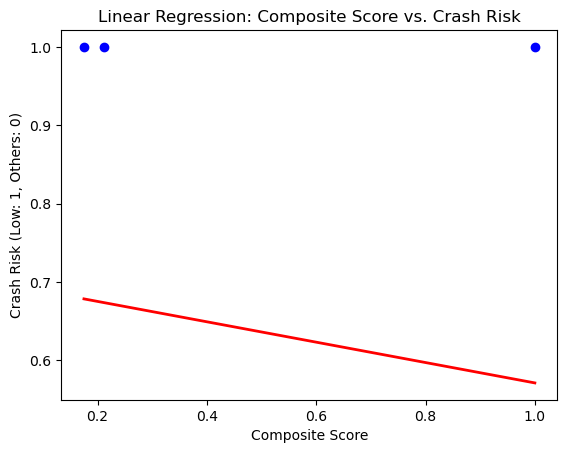

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('comparison.csv')

# Step 2: Prepare the data
X = data['composite score'].values.reshape(-1, 1)  # Independent variable: Composite score
y = data['crash risk'].apply(lambda x: 1 if x == 'Low' else 0)  # Dependent variable: Crash risk (binary)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Step 7: Visualize the results
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Composite Score')
plt.ylabel('Crash Risk (Low: 1, Others: 0)')
plt.title('Linear Regression: Composite Score vs. Crash Risk')
plt.show()


In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv('comparison.csv')

# Split data into features (X) and target variable (y)
X = data['composite score'].values.reshape(-1, 1)
y = data['crash risk'].map({'Low': 0, 'Medium': 1}).values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression()),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gaussian Process Regression": GaussianProcessRegressor(),
    "Support Vector Regression": SVR(),
    "MLP": MLPRegressor(),
    "LSTM": Sequential([LSTM(50, activation='relu', input_shape=(1, 1)), Dense(1)])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    if name == "LSTM":
        X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
        X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train_lstm, y_train, epochs=100, verbose=0)
        y_pred = model.predict(X_test_lstm)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Convert results to DataFrame
results_df = pd.DataFrame(results.items(), columns=['Model', 'MSE'])

print(results_df)






1/1 [==============================] - 0s 320ms/step
                         Model           MSE
0            Linear Regression  1.314633e-01
1          Logistic Regression  0.000000e+00
2            Gradient Boosting  1.599914e-07
3                Random Forest  2.643333e-02
4                     AdaBoost  2.083333e-02
5                Decision Tree  0.000000e+00
6  Gaussian Process Regression  9.884546e+02
7    Support Vector Regression  2.728574e-02
8                          MLP  1.292757e-01
9                         LSTM  8.306561e-02


In [69]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('comparison.csv')

# Check the data types of columns
print(data.dtypes)

# Convert 'crash risk' column to numeric
data['crash risk'] = pd.Categorical(data['crash risk'], ordered=True, categories=["Low", "Medium", "High"])
data['crash risk'] = data['crash risk'].cat.codes

# Drop rows with missing 'crash risk' values
data.dropna(subset=['crash risk'], inplace=True)

# Check if there are sufficient data points for analysis
if len(data) < 2:
    print("Insufficient data points to perform analysis.")
else:
    # 1. Correlation Analysis
    correlation, p_value = pearsonr(data['composite score'], data['crash risk'])
    print("Correlation Coefficient:", correlation)
    print("P-value:", p_value)
    if p_value < 0.05:
        print("Correlation is statistically significant.")
    else:
        print("Correlation is not statistically significant.")

    # 2. Regression Analysis
    X = data[['composite score']]
    y = data['crash risk']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if len(X_train) == 0 or len(X_test) == 0:
        print("Insufficient data points to split into train and test sets.")
    else:
        # Linear Regression
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        lr_pred = lr.predict(X_test)
        lr_mse = mean_squared_error(y_test, lr_pred)
        print("Linear Regression MSE:", lr_mse)

        # Random Forest Regression
        rf = RandomForestRegressor(random_state=42)
        rf.fit(X_train, y_train)
        rf_pred = rf.predict(X_test)
        rf_mse = mean_squared_error(y_test, rf_pred)
        print("Random Forest Regression MSE:", rf_mse)


year                 int64
composite score    float64
crash risk          object
dtype: object
Correlation Coefficient: -0.07409370276747083
P-value: 0.7929912269257847
Correlation is not statistically significant.
Linear Regression MSE: 0.13146325315626192
Random Forest Regression MSE: 0.0418


In [73]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the merged file containing all six parameters
df = pd.read_csv('comparison with crash risk.csv')

# Step 2: Drop any rows with missing values
df_filtered = df.dropna()

# Check if there are any rows left after filtering
if df_filtered.empty:
    print("DataFrame is empty after filtering out rows with missing values.")
else:
    # Step 3: Encode 'crash risk' column into numerical values
    label_encoder = LabelEncoder()
    df_filtered['crash risk'] = label_encoder.fit_transform(df_filtered['crash risk'])

    # Step 4: Calculate the correlation coefficient for each parameter with crash risk
    correlation_coefficients = {}
    parameters = ['NCSKEW', 'KURTOSIS', 'VOLATILITY', 'SHARPE RATIO', 'AVG DAILY RETURNS', 'TURNOVER RATIO']
    for param in parameters:
        correlation = df_filtered['crash risk'].corr(df_filtered[param])
        correlation_coefficients[param] = correlation

    # Step 5: Print correlation coefficients
    print("Correlation coefficients with crash risk:")
    for param, correlation in correlation_coefficients.items():
        print(f"{param}: {correlation}")


Correlation coefficients with crash risk:
NCSKEW: 0.15191928357910314
KURTOSIS: -0.29272800277159755
VOLATILITY: 0.5344104465463467
SHARPE RATIO: -0.4908184976347659
AVG DAILY RETURNS: -0.20015436133271136
TURNOVER RATIO: 0.07204202542137594


C:\Users\HP\AppData\Local\Temp\ipykernel_25872\4255427965.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['crash risk'] = label_encoder.fit_transform(df_filtered['crash risk'])


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import pearsonr

# Step 1: Load and prepare the data
data = pd.read_csv('comparison with crash risk.csv')

# Step 2: Remove rows with missing values
data.dropna(inplace=True)

# Step 3: Split data into features (parameters) and target (risk level)
X = data[['NCSKEW', 'KURTOSIS', 'VOLATILITY', 'SHARPE RATIO', 'AVG DAILY RETURNS', 'TURNOVER RATIO']]
y = data['crash risk']

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define preprocessing steps
categorical_features = ['crash risk']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Pass through other columns
)

# Step 6: Create and train the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
correlation, _ = pearsonr(y_pred, y_test)
print("Correlation Coefficient:", correlation)


ValueError: A given column is not a column of the dataframe

In [79]:
import pandas as pd
from scipy.stats import kendalltau

# Step 1: Load the data
data = pd.read_csv('comparison with crash risk.csv')

# Step 2: Group the data by year
grouped_data = data.groupby('DATE')

# Step 3: Calculate Kendall Tau correlation coefficients for each year
kendall_tau_correlation = {}
for year, group in grouped_data:
    parameters = ['NCSKEW', 'KURTOSIS', 'VOLATILITY', 'SHARPE RATIO', 'AVG DAILY RETURNS', 'TURNOVER RATIO']
    correlation_coefficients = {}
    for i in range(len(parameters)):
        for j in range(i+1, len(parameters)):
            param1 = parameters[i]
            param2 = parameters[j]
            tau, _ = kendalltau(group[param1], group[param2])
            correlation_coefficients[f'{param1}-{param2}'] = tau
    kendall_tau_correlation[year] = correlation_coefficients

# Step 4: Check the impact with crash risk
for year, correlation_coefficients in kendall_tau_correlation.items():
    print(f"Year: {year}")
    for pair, tau in correlation_coefficients.items():
        print(f"{pair}: Kendall Tau = {tau}")


Year: 01-01-2003
NCSKEW-KURTOSIS: Kendall Tau = nan
NCSKEW-VOLATILITY: Kendall Tau = nan
NCSKEW-SHARPE RATIO: Kendall Tau = nan
NCSKEW-AVG DAILY RETURNS: Kendall Tau = nan
NCSKEW-TURNOVER RATIO: Kendall Tau = nan
KURTOSIS-VOLATILITY: Kendall Tau = nan
KURTOSIS-SHARPE RATIO: Kendall Tau = nan
KURTOSIS-AVG DAILY RETURNS: Kendall Tau = nan
KURTOSIS-TURNOVER RATIO: Kendall Tau = nan
VOLATILITY-SHARPE RATIO: Kendall Tau = nan
VOLATILITY-AVG DAILY RETURNS: Kendall Tau = nan
VOLATILITY-TURNOVER RATIO: Kendall Tau = nan
SHARPE RATIO-AVG DAILY RETURNS: Kendall Tau = nan
SHARPE RATIO-TURNOVER RATIO: Kendall Tau = nan
AVG DAILY RETURNS-TURNOVER RATIO: Kendall Tau = nan
Year: 01-01-2004
NCSKEW-KURTOSIS: Kendall Tau = nan
NCSKEW-VOLATILITY: Kendall Tau = nan
NCSKEW-SHARPE RATIO: Kendall Tau = nan
NCSKEW-AVG DAILY RETURNS: Kendall Tau = nan
NCSKEW-TURNOVER RATIO: Kendall Tau = nan
KURTOSIS-VOLATILITY: Kendall Tau = nan
KURTOSIS-SHARPE RATIO: Kendall Tau = nan
KURTOSIS-AVG DAILY RETURNS: Kendall Tau 

In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load the data
data = pd.read_csv('comparison with crash risk.csv')

# Step 2: Prepare the features and target variable
X = data[['NCSKEW', 'KURTOSIS', 'VOLATILITY', 'SHARPE RATIO', 'AVG DAILY RETURNS', 'TURNOVER RATIO']]
y = data['crash risk']

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA to reduce dimensionality
pca = PCA(n_components=1)
principal_components = pca.fit_transform(X_scaled)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size=0.2, random_state=42)

# Step 6: Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Predict the crash risk for test data
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
model = LogisticRegression()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)


Cross-Validation Scores: [1.         1.         0.66666667 0.66666667 0.66666667]
Mean Cross-Validation Score: 0.7999999999999999


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [84]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load the dataset
df = pd.read_csv('comparison with crash risk.csv')

# Separate features (X) and target variable (y)
X = df.drop(columns=['DATE', 'crash risk'])  # Exclude non-numeric columns and target variable
y = df['crash risk']

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)


             Feature  Importance
2         VOLATILITY    0.291775
3       SHARPE RATIO    0.195792
5     TURNOVER RATIO    0.179591
0             NCSKEW    0.128188
1           KURTOSIS    0.116976
4  AVG DAILY RETURNS    0.087678
